In [2]:
import os
import glob
import math
import random

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display_png
from PIL import Image, ImageOps

from tensorflow.python.keras.layers import Conv2DTranspose
from tensorflow.python import keras
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Conv2D, Dense, Input, MaxPooling2D, UpSampling2D, Lambda
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator

In [3]:
import cv2


img_size = 224
def rgb2lab(rgb):
    assert rgb.dtype == 'uint8'
    return cv2.cvtColor(rgb, cv2.COLOR_RGB2Lab)

def lab2rgb(lab):
    assert lab.dtype == 'uint8'
    return cv2.cvtColor(lab, cv2.COLOR_Lab2RGB)

def get_lab_from_data_list(data_list):
    x_lab = []
    for f in data_list:
        rgb = img_to_array(
            load_img(
                f, 
                target_size=(img_size, img_size)
            )
        ).astype(np.uint8)
        lab = rgb2lab(rgb)
        x_lab.append(lab)
    return np.stack(x_lab)

In [4]:
#모델 불러오기

from keras.models import load_model

model = load_model('auto_colorize.h5')

Using TensorFlow backend.


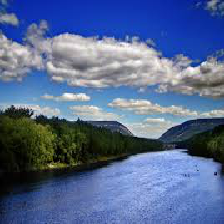

In [5]:
test_img = load_img('./img/test_img.jpeg', target_size=(224,224))

test_img

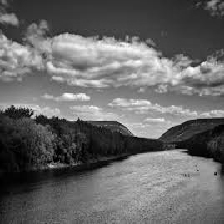

In [6]:
gray_img = ImageOps.grayscale(test_img)
gray_img

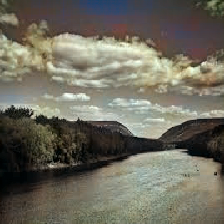

In [33]:
test_lab = []
lab = rgb2lab(img_to_array(test_img).astype(np.uint8))
test_lab.append(lab)
test_x = np.stack(test_lab)[:,:,:,0:1]

preds = model.predict(test_x)

pred_lab = np.concatenate((test_x,preds),3).astype(np.uint8)
pred_rgb=lab2rgb(pred_lab[0,:,:,:])
pred_rgb.shape
pred_img = array_to_img(pred_rgb)
pred_img